# Pràctica 6: Naive Bayes


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Ús Naive Bayes Sci-kit Learn (60%)
* B. Implementació Naive Bayes (40%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.

<a href="https://www.flickr.com/photos/mattbuck007/3676624894"><img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2014/12/naive-bayes-classifier.jpg" width=500></a>


## Introducció

Els models Naive Bayes són un grup d’algoritmes de classificació extremadament ràpids i senzills que sovint són adequats per a conjunts de dades de molt alta dimensió.

Com que són tan ràpids i tenen tan pocs paràmetres, acaben sent molt útils com a ràpid baseline per a un problemes de classificació senzills.

Aquesta secció se centrarà en una explicació intuïtiva de com funcionen els classificadors ingenus de Bayes.


### Classificació bayesiana

Els classificadors de Bayes ingenus es basen en el teorema de Bayes, que és una equació que descriu la relació de probabilitats condicionals de quantitats estadístiques.

A la classificació bayesiana, ens interessa trobar la probabilitat d'una etiqueta donades algunes característiques observades, que podem escriure com $ P (y ~|~ X) $.

El teorema de Bayes ens explica com expressar-ho en termes de quantitats que podem calcular més directament:

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Utilitzant l'assumpció ingenua d'independencia condicional, podem simplificar la relació per tot $i$.

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$

Ja que $P(x_1, \dots, x_n)$ és constant donada una entrada, es pot utilitzar la següent simplificació, que será donarà un resultat proporcional al real, per tant, tindrem la mateixa sortida.

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

La classificació final s'obtindrà:

$$ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $$


Tingueu en compte que $P (y)$ també s’anomena **probabilitat de classe** i $P (x_i | y)$ s’anomena **probabilitat condicional**. 

Els diferents classificadors ingenus de Bayes es diferencien principalment pels supòsits que fan sobre la distribució de $P (x_i | y)$. 

Intentem aplicar la fórmula anterior manualment al nostre conjunt de dades meteorològiques. 
    

### Exemple:

Anem a veure un exemple [(extret d'aquesta web)](https://www.geeksforgeeks.org/naive-bayes-classifiers/). Considereu aquestes dades meteorològiques:

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
dataGolf = pd.read_csv('playgolf.csv', delimiter=';')
display(dataGolf)


,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


Haurem de fer algunes precomputacions al nostre conjunt de dades. Hem de trobar $P (x_i | y_j)$ per a cada $x_i$ a $X$ i $y_j$ a $y$. Tots aquests càlculs es mostren a les taules següents:


<img src="https://media.geeksforgeeks.org/wp-content/uploads/naive-bayes-classification.png" width=500>



Cada taula ha calculat $P(x_i | y_j)$ per cada $x_i$ en $X$ i $y_j$ en $y$. Per exemple, la probabilitat de jugar a golf donat que la temperatura és fresca, és a dir, $P(temperature = Cool | PlayGolf = Yes) = 3/9$.

A més, hem de trobar les probabilitats de classe ($P (y)$). Per exemple, $P (PlayGolf = Yes) = 9/14$.

Ja podem fer servir el classificador ingenu de Bayes. Per exemple, si avui tenim aquestes condicions climatològiques, jugarem al golf?

In [2]:
today_golf = ['Sunny', 'Hot', 'Normal', False]

$P(Yes|today) = \frac{P(Outlook=Sunny|Yes) P(Temperature=Hot|Yes) P(Humidity=Normal|Yes) P(Wind=False|Yes) P(Yes)}{P(today)}$

$P(No|today) = \frac{P(Outlook=Sunny|No) P(Temperature=Hot|No) P(Humidity=Normal|No) P(Wind=False|No) P(No)}{P(today)}$

Ignorem el $P(today)$ per què es comú a les dues probabilitats, i calculem:

$$P(Yes|today) \propto \frac{2}{9}·\frac{2}{9}·\frac{6}{9}·\frac{6}{9}·\frac{9}{14} \simeq 0.0141 $$

$$P(No|today) \propto \frac{3}{5}·\frac{2}{5}·\frac{1}{5}·\frac{2}{5}·\frac{5}{14} \simeq 0.0068 $$

Podem normalitzar-ho per sumar 1, 
$$P(Yes|today) = \frac{0.0141}{0.0068+0.0141}=0.67$$
$$P(No|today) = \frac{0.0068}{0.0068+0.0141}=0.33$$

In [3]:
today_df_golf = pd.DataFrame([today_golf], columns = ['Outlook','Temperature', 'Humidity','Windy'])

from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

X_golf = dataGolf.drop("PlayGolf", axis="columns")
y_golf = dataGolf["PlayGolf"]

enc = OrdinalEncoder()
enc.fit(X_golf)
X_golf_encoded = enc.transform(X_golf)

model_cat = CategoricalNB(alpha=1)
model_cat.fit(X_golf_encoded, y_golf)

model_cat.predict_proba(enc.transform(today_df_golf))
(pd.read_csv('zoo_animal.csv'))

### Tipus de Classificadors Naive Bayes
Tot el que necessitem ara és algun model per calcular **$ P(x_i \mid y) $** per a cada etiqueta, i n'existeixen varis depenent del tipus de dades. 

Podeu trobar l'explicació més precisa a la documentació, pero a continuació n'explicarem els trets fonamentals (Sabrieu dir quin model hem fet servir en l'exemple anterior?):

Tingueu en compte que $\alpha$ es un prior de suavització, i tenen en compte característiques no vistes durant l'aprenentatge. Impedeixen probabilitats nul·les en altres càlculs. Si $\alpha = 1$, s’anomena suavització de Laplace, mentre que $\alpha < 1$ s’anomena suavització de Lidstone.


#### [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
Si tenim dades continues, i creiem que asumeixen una distribució normal, les podem modelitzar amb la mitja i la desviació estandar.
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

#### [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes)
Es fa servir si tenim caracteristiques que compten occurencies. Per exemple, en text, si comptem quantes vegades apareix un terme en el document (una paraula). 

$$P(x_i \mid y)\sim \hat{\theta}_{yi} · x_i = \frac{ N_{yi} + \alpha}{N_y + \alpha n} · x_i$$

#### [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)
Si les dades són binaries, millor utilitzar aquesta problabilitat.

$$P(x_i \mid y) = P(i \mid y) · x_i + (1 - P(i \mid y)) · (1 - x_i)$$

#### [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)
Si les dades són categoriques.
$$P(x_i = t \mid y = c ; \alpha) = \frac{ N_{tic} + \alpha}{N_{c} + \alpha n_i}$$



### Datasets

Es faràn servir varies bases de dades per comparar els mètodes més idonis depenent del tipus de dades:

* [**playgolf**](https://medium.com/@hrishavkmr/naive-bayes-in-machine-learning-5c0972340b76) (db: `playgolf.csv`)
* [**iris**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (db: `datasets.load_iris`)
* [**zoo**](https://www.kaggle.com/uciml/zoo-animal-classification) (db: `zoo_animal.csv`)
* [**heart-disease-uci**](https://www.kaggle.com/ronitf/heart-disease-uci) (db: `heart.csv`)
* [**20newsgroups**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html) (db: `datasets.fetch_20newsgroups`) (Al appendix veure-ho com tranformar text en caracteristiques)


## A. Ús Naive Bayes Sci-kit Learn (60%)

En aquest apartat us recomano que feu ús de funcions propies per a llegir una base de dades, aplicar-hi un model, fer crosvalidacio i que retorni els resultats. D'aquesta forma podreu reaprofitar molt de codi.





In [214]:
import pandas as pd
import numpy as np
import sklearn.datasets 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

def load_dataset(which):
    X, y = None, None
    # si s'han de netejar o codificar les dades, feu-ho aqui directament
    if which == "iris":
        X,y = load_iris()['data'],load_iris()['target']
    elif which == "playgolf":
        df = pd.read_csv("playgolf.csv",delimiter=';')
        y=OrdinalEncoder().fit_transform(df['PlayGolf'].values.reshape(-1,1))
        df = df[[x for x in dataGolf if x!='PlayGolf']]
        X = OrdinalEncoder().fit_transform(df)
       
    elif which == "zoo":
        df = pd.read_csv('zoo_animal.csv')
        y= df['class_type']
        X = df[[x for x in df if x!='animal_name']]
        X =OrdinalEncoder().fit_transform(X)
    elif which == "heart-disease-uci":
        df = pd.read_csv("heart.csv")
        y=  df['target']
        X = df[[x for x in df if x!='target']]
        
    elif which == "20newsgroups":
        data = fetch_20newsgroups()
        categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
        train = fetch_20newsgroups(subset='train', categories=categories)
        test = fetch_20newsgroups(subset='test', categories=categories)
        X = TfidfVectorizer().fit_transform(train.data).toarray()
        y = train.target
        
    else:
        raise ("UNKNOWN DATASET")
    
    return X, y

def experiment(dataset_name, model, debug=True):
    X, y = load_dataset(dataset_name)

    if X is None or y is None:
        return -1

    if debug:
        model.fit(X, y)
        return model.score(X, y)
    else:            
        try:
            model.fit(X, y)
            return model.score(X, y)
        except Exception as e:
            print('\033[91m'+"ERROR {}".format(e)+'\x1b[0m')
            return -100    
    


In [215]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB

models = [GaussianNB(), MultinomialNB(),BernoulliNB(),CategoricalNB()]
datasets = ['iris','playgolf','zoo','heart-disease-uci','20newsgroups']

for d in datasets:
    for m in models:
        result = experiment(d, m)
        print('{} + {:20} = {:.3f}'.format(d, str(m), result))

print("DONE")

iris + GaussianNB(priors=None, var_smoothing=1e-09) = 0.960
iris + MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.953
iris + BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) = 0.333
iris + CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.933
playgolf + GaussianNB(priors=None, var_smoothing=1e-09) = 0.857
playgolf + MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.786
playgolf + BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) = 0.857
playgolf + CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.929
zoo + GaussianNB(priors=None, var_smoothing=1e-09) = 1.000
zoo + MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.980
zoo + BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) = 0.990
zoo + CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True) = 1.000
heart-disease-uci + GaussianNB(priors=None, var_smoothing=1e-09) = 0.842
heart-disease-uci + MultinomialNB

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



20newsgroups + GaussianNB(priors=None, var_smoothing=1e-09) = 1.000
20newsgroups + MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.896
20newsgroups + BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) = 0.888
20newsgroups + CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True) = 0.278
DONE


#### Preguntes
1. Carrega els diferents datasets i explica quin tipus de classificador de bayes creieu que serà més adient per les dades.

2. Fés una taula mostrant el accuracy de cada model per cada un dels datasets. 

3. Mostra els resultats gràficament. Quin tipus de Bayes funciona millor per quin dataset. De mitjana, quin ho fa millor?

4. Et sorprenen el resultats? Com és possible que certs models funcionin per dades que en principi no haurien de funcionar? Explica els atributs més importants de cada classificador. Mostra'n exemples i analitza'ls.

5. Si el nostre dataset conté dades de diferent naturalesa, és a dir, uns atributs categorics, d'altres continus, d'altres binaris, creus que es podrien combinar els diferents classificadors de bayes? Seguint la formula original, com es faria?


### 1.- Carrega els diferents datasets i explica quin tipus de classificador de bayes creieu que serà més adient per les dades.

#### Iris

In [7]:

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Podem veure que totes les dades son continues amb la cual cosa no es requerira de cap encoder i degut a la condició de continuitat es creu que Gaussian Naive Bayes serà la millor elecció.

#### Play Golf

In [8]:
df = pd.read_csv("playgolf.csv",delimiter=';')
df

,Outlook,Temperature,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


Aqui es pot apreciar que totes les columnes son de tipus categoric; es dedueix que fa falta codificar(amb el ordinal encoder) per poder tractar amb les dades. El classificador que es suposa que anirà millor serà el CategoricalNB.

### Zoo

In [9]:
df = pd.read_csv("zoo_animal.csv")
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Podem veure que tots els atributs excepte el nombre de cames son categorics. es pot considerar el nombre de cames com una classificació així que ho podriem codificar de tal manera que tenim totes les columnes categoríques i totes menys una binaria. Degut a la bianrietat es suposa que el classificador BernouliNB hauria de ser el millor.

#### heart-disease-uci

In [10]:
pd.read_csv("heart.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Es pot apreciar que hi ha diferents tipus d'atributs en aquest dataset: continus, multiclasse i binaris. Davant d'això es proposa el model GaussianNB com a millor solució degut  a que te varis diferents tipus de dades continues i hauria de donar resultats similars BernouliNB perque tambe en te bastantes de binaries.

### 20newsgroup

In [11]:
data = fetch_20newsgroups()
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
X = TfidfVectorizer().fit_transform(train.data).toarray()
y = train.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

El que hem fet amb aquest dataset ha sigut crear un diccionari de praules i per cada document fer un recompte del cops que ha aparegut en el document en funció dels cops que apareix en tots els documents. Aconseguim així que cada fila del nostre input sigui un document convertit  a un histograma(tenint la relació amb tots els documents)
Degut a que es treballa amb dades recomptes de dades pensariem que el MultinomialNB seria una bona solució.

#### 2.- Fés una taula mostrant el accuracy de cada model per cada un dels datasets.


In [211]:
models = [GaussianNB(), MultinomialNB(),BernoulliNB(),CategoricalNB()]
datasets = ['iris','playgolf','zoo','heart-disease-uci','20newsgroups']
info2 = {"Model":[],"Dataset":[],"Acc":[]} ## Format representacio grafica
info = {} ## Format representacio taula
for d in datasets:
    for m in models:
        if d not in info: info[d] = {}
        exp = experiment(d, m)
        info[d][str(m)] = exp
        info2['Model'].append(str(m))
        info2['Dataset'].append(d)
        info2['Acc'].append(exp)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [212]:
df = pd.DataFrame(info)
df['Avg'] = df.mean(axis=1)
df['Std'] = df.std(axis=1)
df

,iris,playgolf,zoo,heart-disease-uci,20newsgroups,Avg,Std
"GaussianNB(priors=None, var_smoothing=1e-09)",0.960000,0.857143,1.000000,0.844884,1.000000,0.932405,0.068153
"MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)",0.953333,0.785714,0.980198,0.752475,0.895959,0.873536,0.090128
"BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)",0.333333,0.857143,0.990099,0.838284,0.887599,0.781292,0.230030
"CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)",0.933333,0.928571,1.000000,0.904290,0.278216,0.808882,0.267226


#### 3.- Mostra els resultats gràficament. Quin tipus de Bayes funciona millor per quin dataset. De mitjana, quin ho fa millor?

In [213]:
import plotly.express as px
df2 = pd.DataFrame(info2)
fig=px.bar( 
    data_frame = df2,
    x = df2['Dataset'],
    y = df2['Acc'],
    color = 'Model',
    color_discrete_sequence = px.colors.qualitative.Light24,
    title='Accuracies',
    barmode= 'group'

)
fig.show()

Del grafic podem veure que el GaussianNB sempre es manté per sobre del 0.8, si ames ames veiem els resultats de la taula(te la maxima mitjana i la mínima desviació) podriem dir que es el model més robust a diferents problemes de classificació. 


#### 4.- Et sorprenen el resultats? Com és possible que certs models funcionin per dades que en principi no haurien de funcionar? Explica els atributs més importants de cada classificador. Mostra'n exemples i analitza'ls.

Hi ha casos que han resultat sorpresius com pot ser el performance de el model gausià en el dataset 20newgroup o el categorical en el heart-disaes. Per poder explicar aquestes anomalies ens basarem en la robustesa de cadascún dels models; cada model està pensat per optimitzar la manera en que codifica la informació per a que li resulti mes adient(gracies a scikit). Per exemple en el cas de 20newgroup tot i estar comptant ocurrencies no es deixa de treballar amb dades continues i es pot fer la suposició estadística de que les paraules que fem servir segueixen una normal; el cas de heart-disaes el CategoricalNB deu tenir una manera robusta de codificar cada tipus de dada de tal manera que la categorització resulta representativa.

Realitzant un anàlisis postexperimental dels diferents models podem treure atributs de cada model dels que no disponiem abans.Podem assegurar que el model més robust a diferents tipus de datasets es el model Gaussià per les raons expressades en l'exercici previ(model que es probaria primer); podem dir que el model categoric es robust a dades amb representacions simples i clares mentre que per representacions d'histogrames de bag of wards(semblant a tfidf) funciona malament perque la categorització no representa bé les distances. Pel cas del BernouliNB podem destacar el fet de funciona molt be excepte quan les dades son estrictament continues ,aleshores la binarització que fa no deu ser representativa i per tant no aconsegueix bons resultats(investigant una mica he vist que fa servir una binarització amb threshold,el problema es que en el cas de iris per funcionar be hauria de ficar un threshold a la relació de les 3 variables ( que son una bona representació dels tipus de planta)). Pel que respecta al MultinomialNB podem dir que es el segon mes robust, deu ser perque al tractar les dades com a continues també te una nocio de distancia (contra mes classes tingui el target aquesta distancia es menys correcte, pero si en te dos es totalment correcte). Cal destacar que no ha aconseguit superar el performance del GaussianNB ni en el que hauria ser el seu àmbit; les dades contínues( en la defensa d'aquest model diré que per molt poc)

#### 5.- Si el nostre dataset conté dades de diferent naturalesa, és a dir, uns atributs categorics, d'altres continus, d'altres binaris, creus que es podrien combinar els diferents classificadors de bayes? Seguint la formula original, com es faria?

### Intent de barrejar models dividint dataset segons especialitat del model (aproximació per força bruta)

Doncs tecincament si que es podria fetn que cada classificador tracti amb les dades amb les que funciona millor, faci una predicció i es ponderin totes les prediccions; fins i tot es podria arribar a aplicar un model de regressió per saber quines seríen les millors ponderacions.

In [223]:
X,y = load_dataset('heart-disease-uci')
binary = [x for x in X.columns if len(set(X[x]))==2]
cat = [x for x in X.columns if 2<len(set(X[x]))<20  ]
continious = [x for x in X.columns if len(set(X[x]))>20  ]
binary,cat,continious
X_bern = X[binary]
X_cat = X[cat]
X_cont = X[continious]
gauss,multi,bern,categ = GaussianNB(), MultinomialNB(),BernoulliNB(),CategoricalNB()

multi = multi.fit(X_cont,y)
bern = bern.fit(X_bern,y)
categ = categ.fit(X_cat,y)

print(f"MultinomialNB working with continious data gets a train score of: {multi.score(X_cont,y)}")
print(f"BernouliNB working with binary data gets a train score of {bern.score(X_bern,y)}")
print(f"CategoricalNB working with continious data gets a train score of {categ.score(X_cat,y)}")

mean_score = np.sum(np.round(multi.predict(X_cont) * 0.33 + bern.predict(X_bern) * 0.33 + categ.predict(X_cat) * 0.33) == y)/len(y)
print(f"Working with three models and giving to all them the same importance we get a train score of {mean_score}")

MultinomialNB working with continious data gets a train score of: 0.6996699669966997
BernouliNB working with binary data gets a train score of 0.7194719471947195
CategoricalNB working with continious data gets a train score of 0.8316831683168316
Working with three models and giving to all them the same importance we get a train score of 0.7887788778877888


Degut a que el context per a fer gradient descent es complicaba(degut a que cada model afecta columnes diferents) s'ha decidit replantejar el problema com un de força bruta i probar combinació de parametres i si es fixa un dels paràmetres es pot dibuixar la evolució.

Checking X+Y+Z == 1) True
Maximum for 0.0 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.1111111111111111 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) False
Maximum for 0.2222222222222222 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.3333333333333333 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.4444444444444444 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.5555555555555556 probability for bernully is 0.7194719471947195
Checking X+Y+Z == 1) True
Maximum for 0.6666666666666666 probability for bernully is 0.7194719471947195
Checking X+Y+Z == 1) True
Maximum for 0.7777777777777777 probability for bernully is 0.7194719471947195
Checking X+Y+Z == 1) True
Maximum for 0.8888888888888888 probability for bernully is 0.7194719471947195
Checking X+Y+Z == 1) True
Maximum for 1.0 probability for bernully is 0.719471

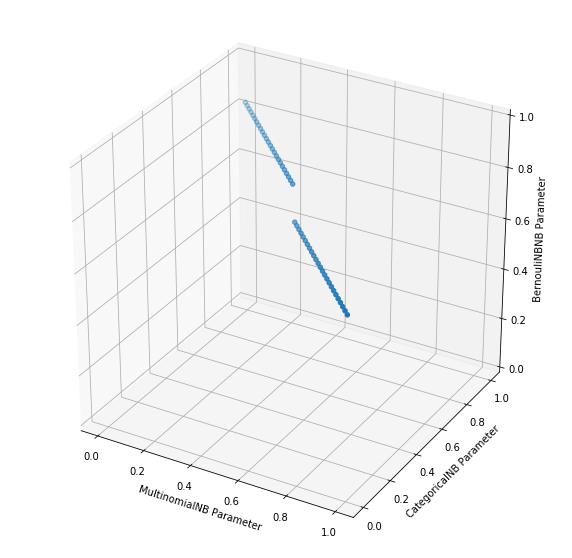

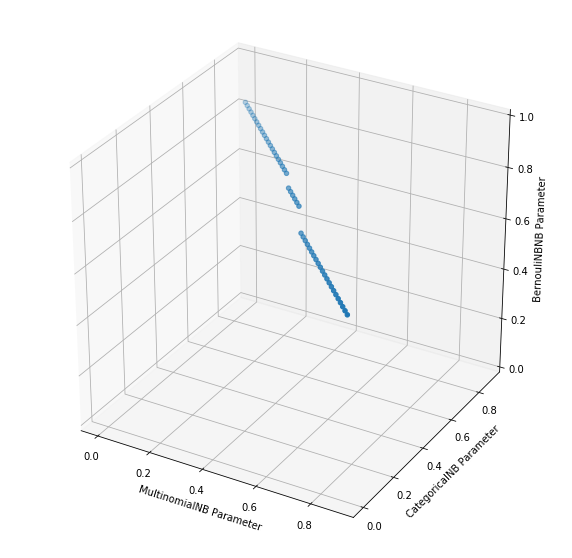

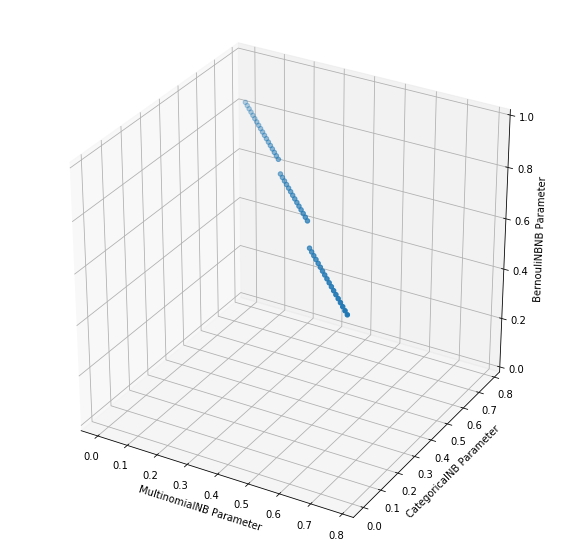

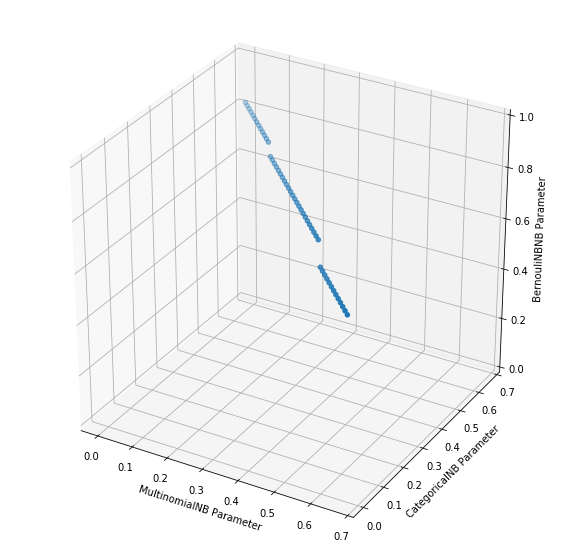

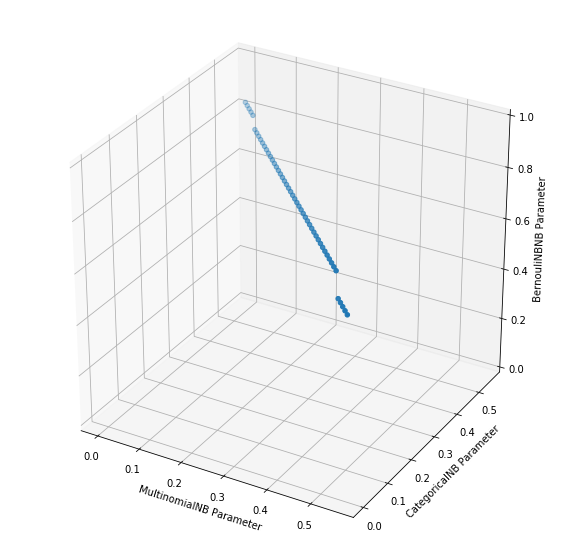

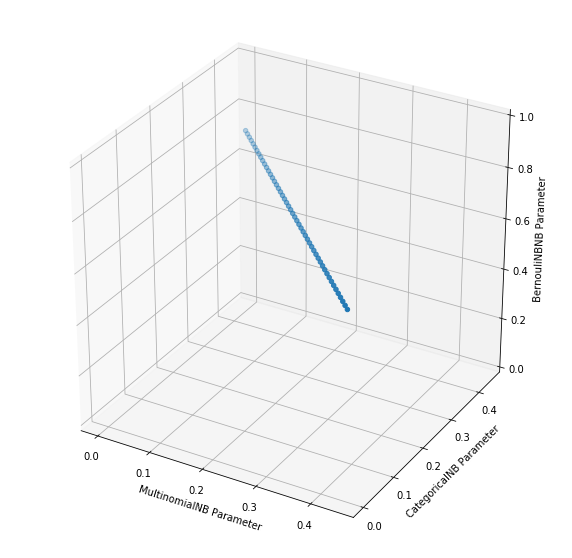

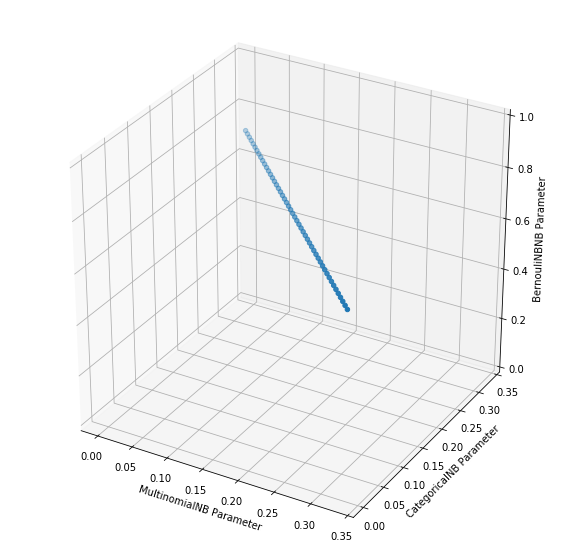

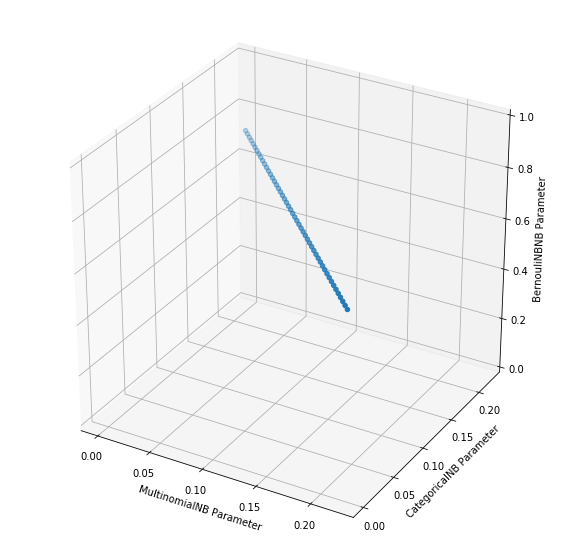

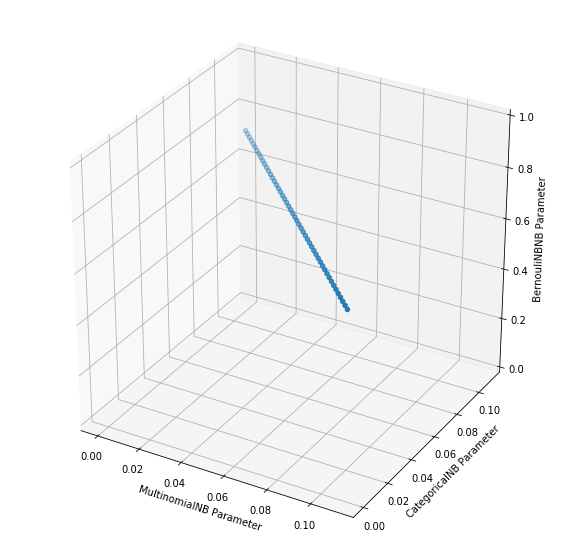

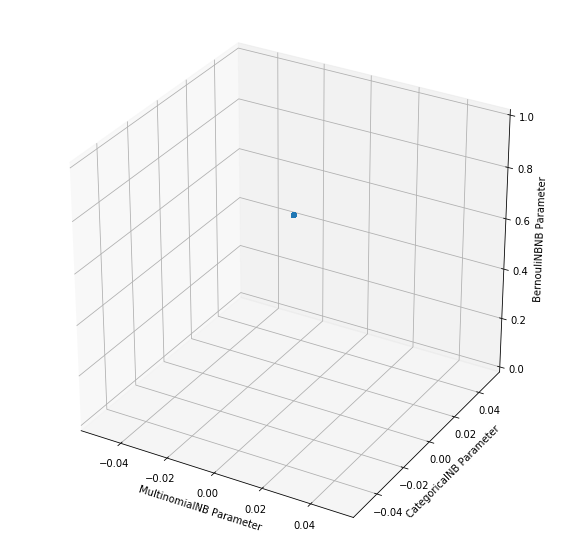

In [224]:
from numba import jit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- 

def f(X,Y,M,Z,z):
    for idx in range(M):
            Z[idx] = np.sum(np.round((X[idx] *p1 + Y[idx]* p2 + p3*x)) == z)/len(z)

    return Z

for x in np.linspace(0,1,10):
    X_ = np.linspace(0,1-x,50)
    Y_ = np.linspace(1-x,0,50)
    print(F"Checking X+Y+Z == 1) {np.all(X_+Y_+x ==1)}")

    p1 = (multi.predict(X_cont))
    p2 = (categ.predict(X_cat))
    p3 = (bern.predict(X_bern))
    Z = f(X_,Y_,X_.shape[0],np.zeros_like(X_),y.values)
    print(f"Maximum for {x} probability for bernully is {np.max(Z)}")
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1,projection='3d')
    ax.set_xlabel( "MultinomialNB Parameter" )
    ax.set_ylabel( "CategoricalNB Parameter" )
    ax.set_zlabel( "BernouliNBNB Parameter" )
    ax.set_zlim(0, 1)
    #Axes3D.plot_wireframe(ax,X_,Y_,Z,label='Surface X+Y+Z=1',color='k',alpha=0.1)
    Axes3D.scatter(ax,X_.flatten(),Y_.flatten(),Z.flatten(),label="MULIT-CATEG_ fixed = BernouliNB")

Checking X+Y+Z == 1) True
Maximum for 0.0 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.1111111111111111 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) False
Maximum for 0.2222222222222222 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.3333333333333333 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.4444444444444444 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.5555555555555556 probability for bernully is 0.6996699669966997
Checking X+Y+Z == 1) True
Maximum for 0.6666666666666666 probability for bernully is 0.6996699669966997
Checking X+Y+Z == 1) True
Maximum for 0.7777777777777777 probability for bernully is 0.6996699669966997
Checking X+Y+Z == 1) True
Maximum for 0.8888888888888888 probability for bernully is 0.6996699669966997
Checking X+Y+Z == 1) True
Maximum for 1.0 probability for bernully is 0.699669

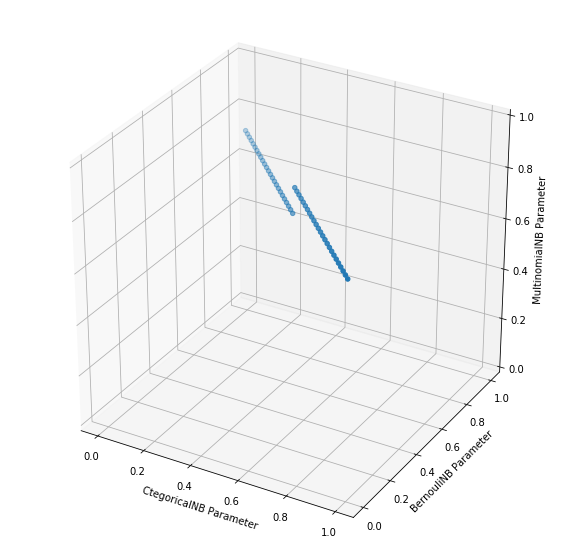

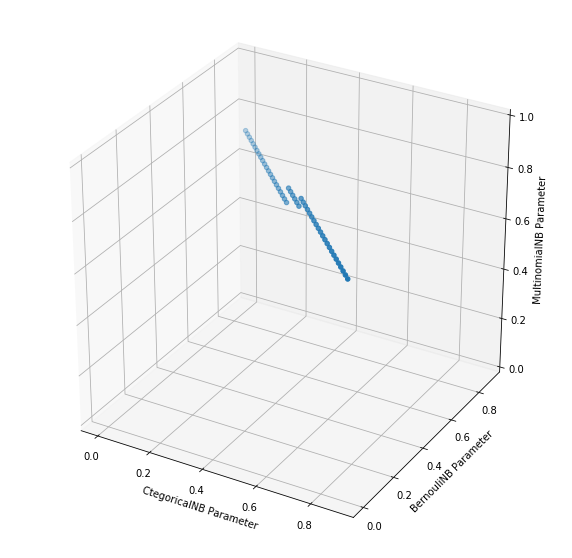

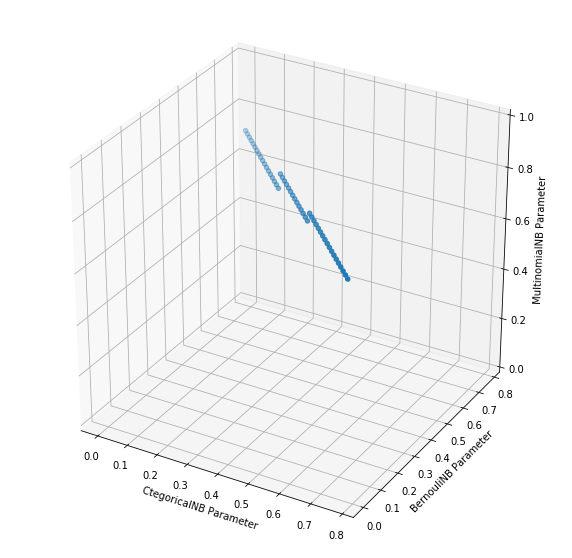

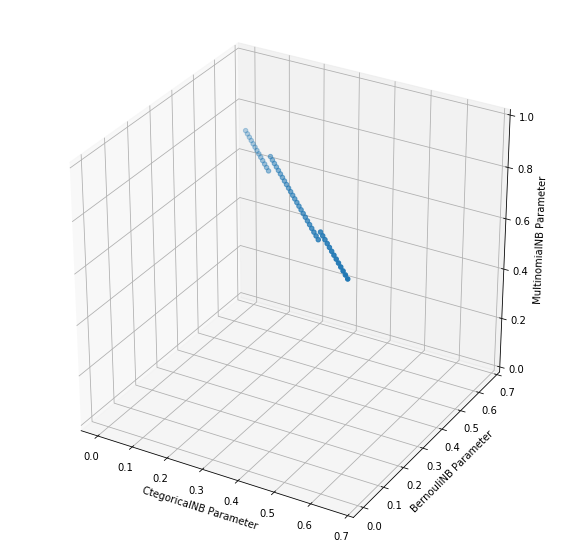

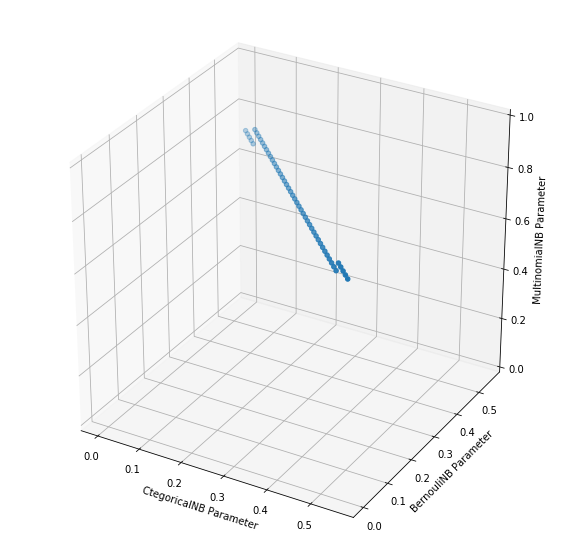

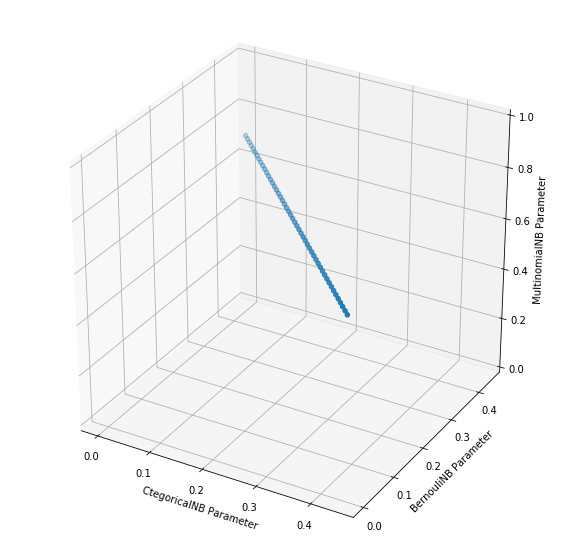

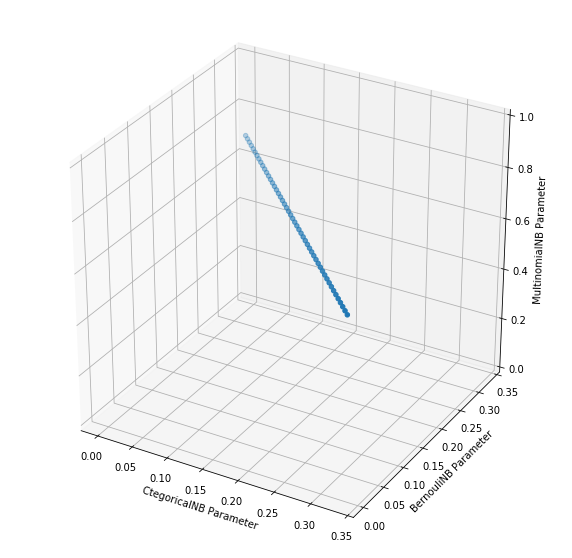

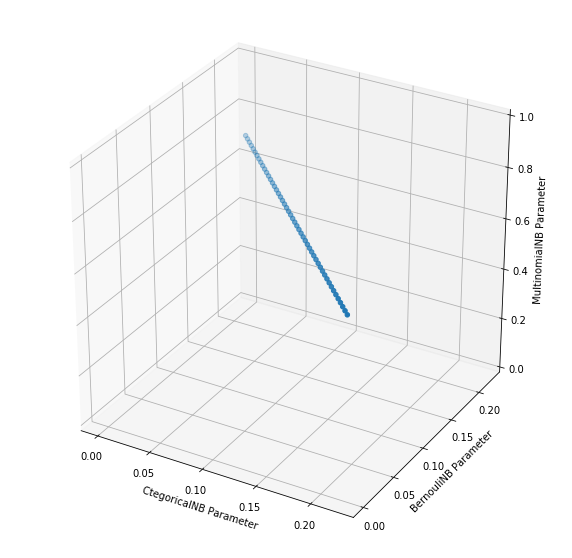

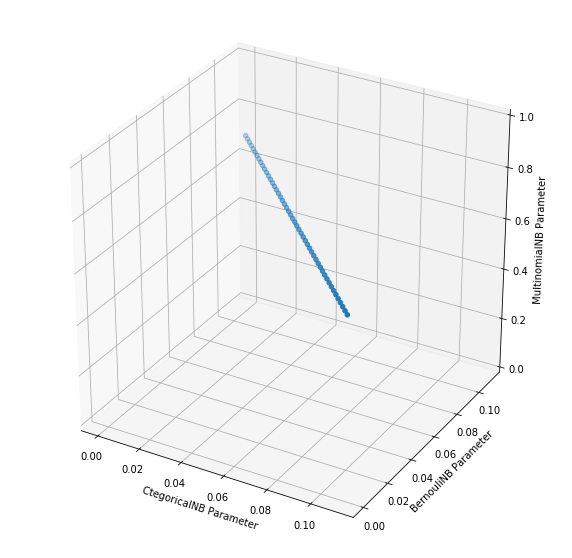

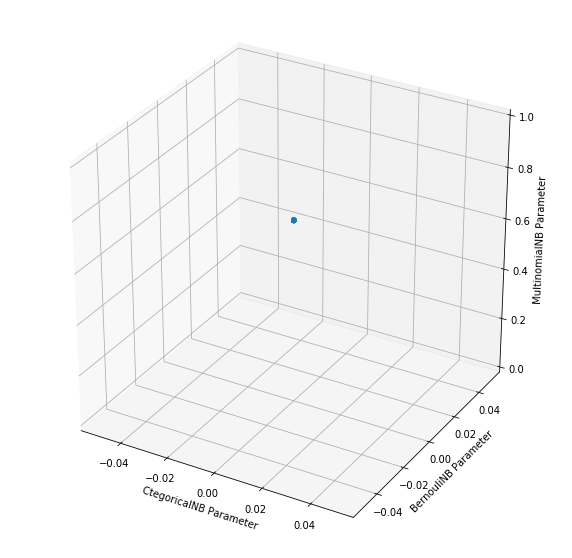

In [16]:
def f(X,Y,M,Z,z):
    for idx in range(M):
            Z[idx] = np.sum(np.round((X[idx] *p2 + Y[idx]* p3 + p1*x)) == z)/len(z)

    return Z

for x in np.linspace(0,1,10):
    X_ = np.linspace(0,1-x,50)
    Y_ = np.linspace(1-x,0,50)
    print(F"Checking X+Y+Z == 1) {np.all(X_+Y_+x ==1)}")

    p1 = (multi.predict(X_cont))
    p2 = (categ.predict(X_cat))
    p3 = (bern.predict(X_bern))
    Z = f(X_,Y_,X_.shape[0],np.zeros_like(X_),y.values)
    print(f"Maximum for {x} probability for bernully is {np.max(Z)}")
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1,projection='3d')
    ax.set_xlabel( "CtegoricalNB Parameter" )
    ax.set_ylabel( "BernouliNB Parameter" )
    ax.set_zlabel( "MultinomialNB Parameter" )
    ax.set_zlim(0, 1)
    #Axes3D.plot_wireframe(ax,X_,Y_,Z,label='Surface X+Y+Z=1',color='k',alpha=0.1)
    Axes3D.scatter(ax,X_.flatten(),Y_.flatten(),Z.flatten(),label="MULIT-CATEG_ fixed = BernouliNB")

Checking X+Y+Z == 1) True
Maximum for 0.0 probability for bernully is 0.7194719471947195
Checking X+Y+Z == 1) True
Maximum for 0.1111111111111111 probability for bernully is 0.7887788778877888
Checking X+Y+Z == 1) True
Maximum for 0.2222222222222222 probability for bernully is 0.7887788778877888
Checking X+Y+Z == 1) True
Maximum for 0.3333333333333333 probability for bernully is 0.7887788778877888
Checking X+Y+Z == 1) True
Maximum for 0.4444444444444444 probability for bernully is 0.7887788778877888
Checking X+Y+Z == 1) True
Maximum for 0.5555555555555556 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.6666666666666666 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.7777777777777777 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 0.8888888888888888 probability for bernully is 0.8316831683168316
Checking X+Y+Z == 1) True
Maximum for 1.0 probability for bernully is 0.8316831

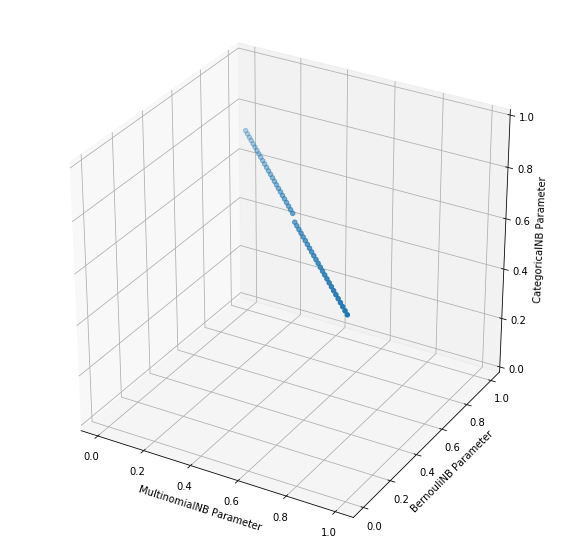

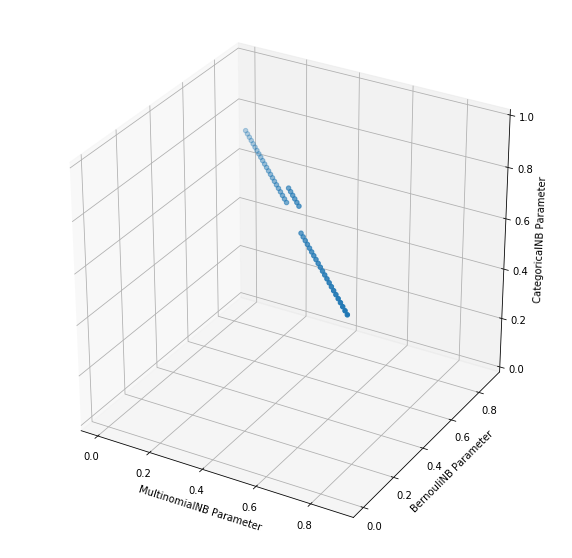

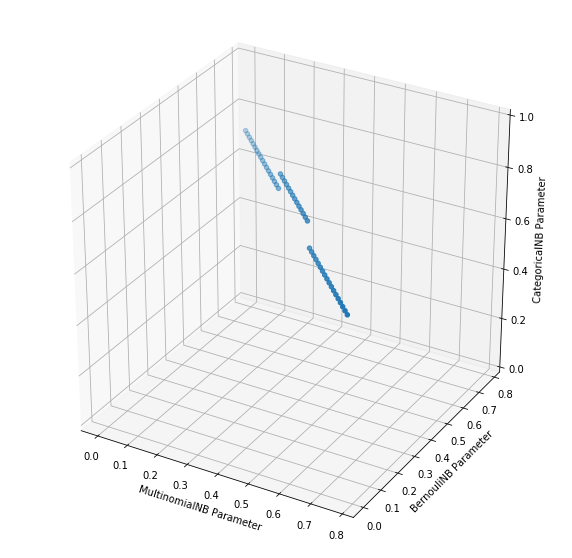

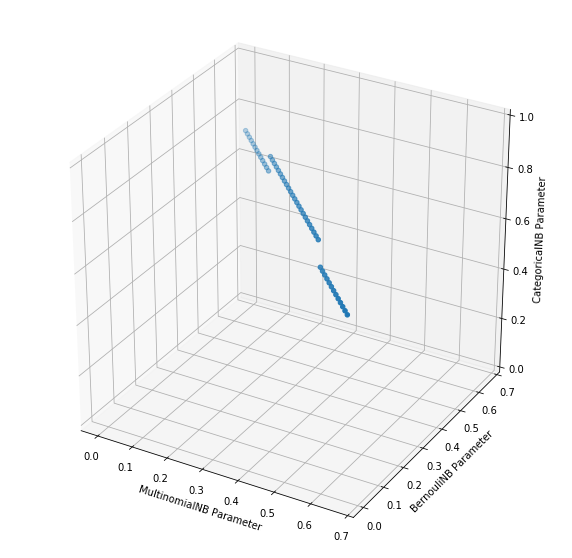

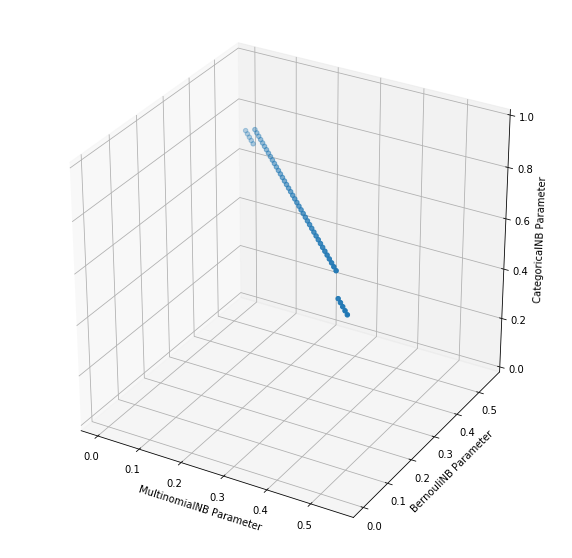

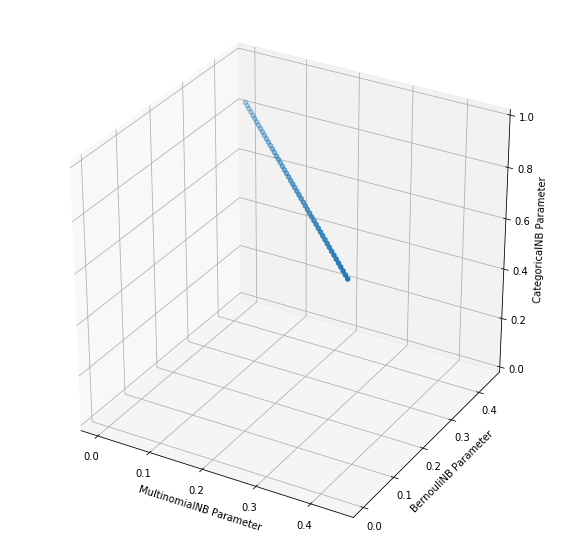

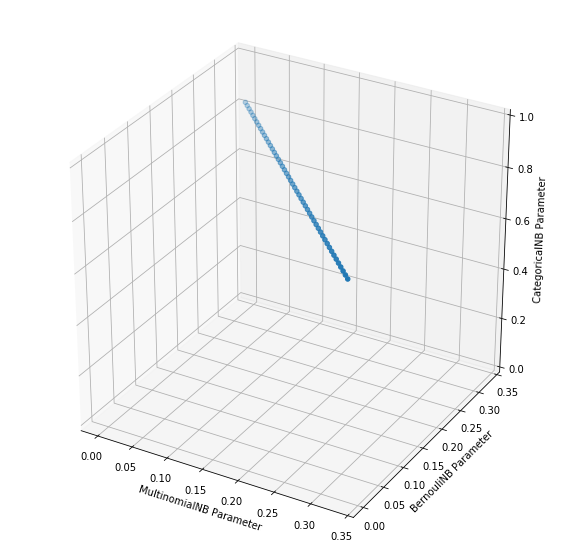

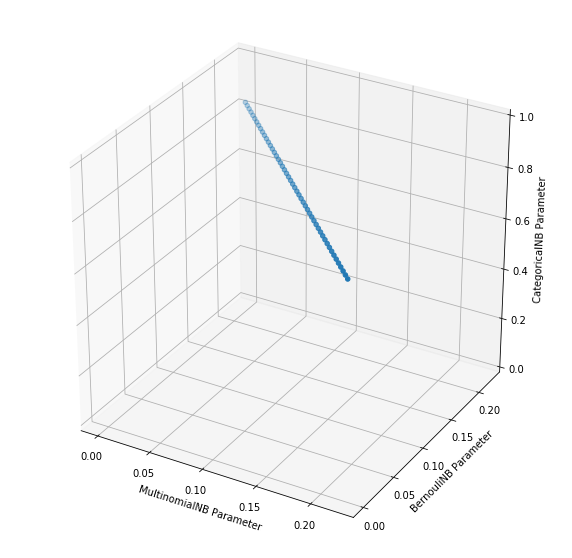

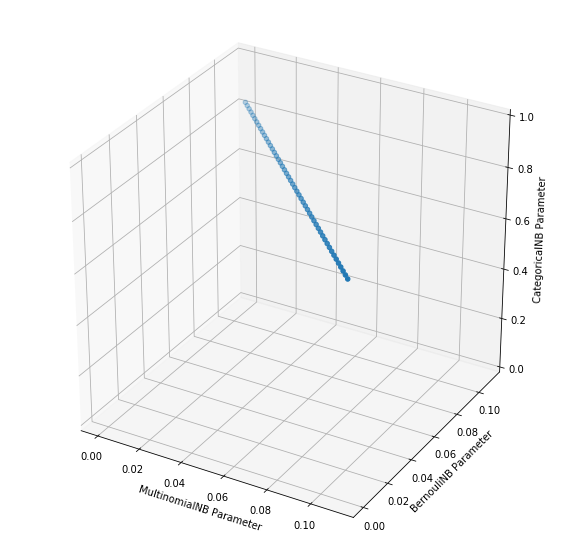

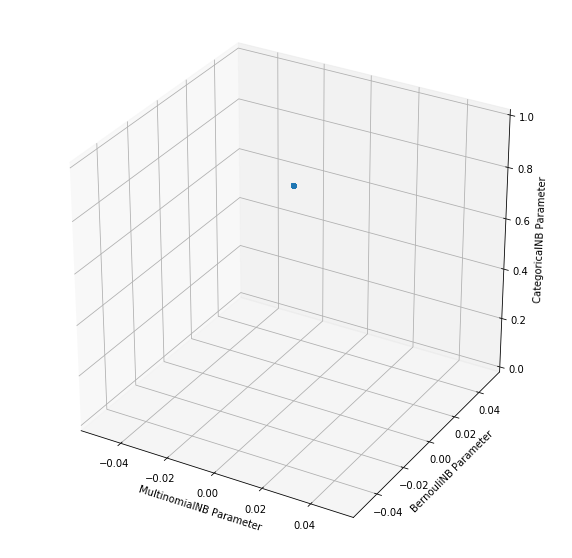

In [18]:
def f(X,Y,M,Z,z):
    for idx in range(M):
            Z[idx] = np.sum(np.round((X[idx] *p1 + Y[idx]* p3 + p2*x)) == z)/len(z)

    return Z

for x in np.linspace(0,1,10):
    X_ = np.linspace(0,1-x,50)
    Y_ = np.linspace(1-x,0,50)
    print(F"Checking X+Y+Z == 1) {np.allclose(X_+Y_+x ,1)}")

    p1 = (multi.predict(X_cont))
    p2 = (categ.predict(X_cat))
    p3 = (bern.predict(X_bern))
    Z = f(X_,Y_,X_.shape[0],np.zeros_like(X_),y.values)
    print(f"Maximum for {x} probability for bernully is {np.max(Z)}")
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1,projection='3d')
    ax.set_xlabel( "MultinomialNB Parameter" )
    ax.set_ylabel( "BernouliNB Parameter" )
    ax.set_zlabel( "CategoricalNB Parameter" )
    ax.set_zlim(0, 1)
    Axes3D.scatter(ax,X_.flatten(),Y_.flatten(),Z.flatten(),label="MULIT-CATEG_ fixed = BernouliNB")

Mitjançant aquestes grafiques i la informació otinguda en elles es pot dir que no augmentarà(rebutjo la meva hipotesi del començament que asseguraba una millora)  .es passa a probar si funcionarà ponderant directament tots els classificadors (aquí es molt més fàcil aplicar regressió).

### Ponderant regresions

Per a no reinventar la roda i demostrar que tot el que s'ha fet fins ara ha estat útil s'ha decidit agafar la classe de regressor multiple implementada en la primera pràctica per a fer una regresió sobre els paràmetres que li pertoquen a cada model. **Per a fer-ho matemàticament correcte es fa una projecció en cada etapa del descens del gradient cap al pla $X + Y+ Z +W = 1$ , ja que volem que els nostres parametres com a probabilitats sumin 1**


Score and weights without projection
0.8811881188118812
[ 0.20961517  0.25526536 -0.16432206  0.57109109]
Score and weights with projection
0.8811881188118812
[0.15896679 0.34324557 0.16138516 0.33640249]


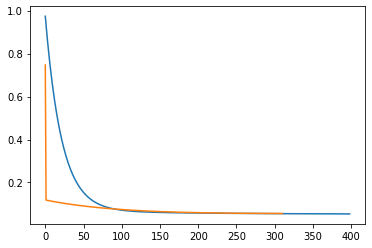

In [69]:
import random
import seaborn as sns
class RegressorPolynomial(object):
    def __init__(self,number_weights,func_init,alpha,regulizer=None):
      self.weights = np.asarray([func_init() for x in range(number_weights+1)])
      self.alpha = alpha
      self.regulizer = regulizer
    def predict(self,X):
      return X@self.weights

    def __update_regulizing(self, x, y):
        m=len(x)
        error = self.predict(x) - y
        cost = 1/(2*m) * np.dot(error.T, error) + self.regulizer * (np.dot(self.weights.T,self.weights))
        self.weights = self.weights * (1 - (self.alpha * self.regulizer)/m) - (self.alpha * (self.regulizer/m) * np.dot(x.T, error)).reshape(1,-1).flatten()
        return cost

    def __update(self, x, y):
        m= len(x)
        error = self.predict(x) - y
        cost = 1/(2*m) * np.dot(error.T, error) 
        self.weights -= (self.alpha * (1/m) * np.dot(x.T, error)).reshape(1,-1).flatten()
        return cost
    def project_weigths(self):
        self.weights[self.weights<0] = 0
        to_add = 1 - sum(self.weights)
        self.weights[1:]+= to_add/len(self.weights[1:])
    def consecutives_differences(self,array,thr):

       array = np.asarray(array)
       return  np.all(np.abs((array[1:] - array[:-1]))[:-5] > thr)  
       
    def fit(self, x, y, max_iter=1000, epsilon=1e-5,draw=True,untill_convergence=False,reg=False,proj=False):
        iter = 0
        max_iter = int(1e5) if untill_convergence else max_iter
        error = ([x for x in range(max_iter)])

        gradient_descent = self.__update_regulizing if reg else self.__update
 
        while iter < max_iter and self.consecutives_differences(error,epsilon):
            error[iter] = gradient_descent(x,y)
            self.project_weigths() if proj else None
            iter+=1
        if draw:sns.lineplot(x=np.arange(iter),y=error[:iter])

        return error


gauss,multi,bern,categ = GaussianNB(), MultinomialNB(),BernoulliNB(),CategoricalNB()

multi = multi.fit(X,y)
bern = bern.fit(X,y)
categ = categ.fit(X,y)
X = np.c_[np.ones(len(X)),multi.predict(X),bern.predict(X),categ.predict(X)]
clf= RegressorPolynomial(3,random.random,alpha=0.01)
clf.fit(X,y)
print(f"Score and weights without projection")
print(np.sum(np.round(clf.predict(X))==y)/len(y))
print(clf.weights)
clf= RegressorPolynomial(3,random.random,alpha=0.01)
clf.fit(X,y,proj=True)
print(f"Score and weights with projection")
print(np.sum(np.round(clf.predict(X))==y)/len(y))
print(clf.weights)
#print(f"Podem veure a arrel dels pesos que nomes li fa cas a el classificador categorical(que es el que millor ho fa))

Ara tenim unes probabilitats, unes projectades i unes altres sense projectar; es probarà sobre les dades originals a veure com funcionen ambdues solucions

In [92]:
X,y = load_dataset('heart-disease-uci')
multi = multi.fit(X,y)
bern = bern.fit(X,y)
categ = categ.fit(X,y)
pred1 = 0.2096 + 0.255 * multi.predict(X) + -0.164 * bern.predict(X) + 0.571 * categ.predict(X)
pred2 = 0.1589 + 0.3432 * multi.predict(X) + 0.1613 * bern.predict(X) + 0.3364 * categ.predict(X)
print(np.sum(np.round(pred1) == y)/len(y))
print(np.sum(np.round(pred2) == y)/len(y))

0.9108910891089109
0.8052805280528053


Cal dir que el primer model de regresio li dona tota la importancia al categorical predict, per això aconsegueix la seva performance mentres que la última projecció del segon model ha repartit la importancia "arbitrariament" i ha perdut aquest performance.

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
multi = multi.fit(X_train,Y_train)
bern = bern.fit(X_train,Y_train)
categ = categ.fit(X_train,Y_train)
pred1 = 0.2096 + 0.255 * multi.predict(X_test) + -0.164 * bern.predict(X_test) + 0.571 * categ.predict(X_test)
pred2 = 0.1589 + 0.3432 * multi.predict(X_test) + 0.1613 * bern.predict(X_test) + 0.3364 * categ.predict(X_test)
print(np.sum(np.round(pred1) == Y_test)/len(Y_test))
print(np.sum(np.round(pred2) == Y_test)/len(Y_test))
X_test

0.7894736842105263
0.7763157894736842


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2


In [102]:
categ.score(X_test,Y_test)

0.7894736842105263

Podem veure com realment el primer model farà cas a tot el que faria cas el CategoricalNB mentre que el model projectat es una aproximació bastant bona al mateix(CategoricalNB).

## B. Implementació Naive Bayes (40%)

En aquest apartat implementarem un classificador Ingenu de Bayes per cada un dels tipus de dades. Per fer això, i que sigui fàcil de comparar amb els resultats del apartat anterior, feu servir un esquelet similar al següent:
        


### NaiveBayes Base

In [173]:
class NaiveBayes(object):
    def __init__(self, alpha):
        self.alpha = alpha
        self.n_samples = 0
        self.class_count_ = []  # numero de exemples de cada categoria
        self.class_prior_ = []  # prior per cada categoria
        self.classes_ = []      # nom o etiqueta de cada label
        self.probab = []

    def __str__(self):
        # toString()  
        return (self.__class__.__name__+"()")
        
    def calcular_conditional(self, X, y):

         raise("TO BE DONE. Ho heu que implementar per cada subclasse")
    
    def calcular_likelihood_log(self, X):
        raise("TO BE DONE. Ho heu que implementar per cada subclasse")


    def calcular_prior(self, y):
        self.class_prior_ = [sum(y==c)/len(y) for c in self.classes_]


    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]
    
    
    def predict_proba(self, X):
        probs = np.exp(np.asarray( self.predict_log_proba(X)))
        total_sum = np.sum(probs, axis=1)
        for i in range(len(self.classes_)):
            probs[:,i] /= total_sum
        return probs

    def predict_log_proba(self, X):
        probs = self.calcular_likelihood_log(X)
        for i in range(len(self.classes_)):
            probs[i] += np.log(self.class_prior_[i])
        return probs

    
    def score(self, X, y):
        return np.sum(self.predict(X) == y) / len(y)
        
    def fit(self, X, y):

        self.n_samples = X.shape[0]
        self.classes_ = np.unique(y).astype(int)

        # calcular p(y)
        self.calcular_prior(y)
        
        # per cada una de les columnes de x

        self.calcular_conditional(X, y)


### GaussianNaiveBayes

##### Non-vectorized

In [219]:
class GaussianNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.theta_ = None  # mean
        self.sigma_ = None  # var
        

    def calcular_conditional(self, X, y):
        # todo
        # heu de calcular la mitjana i la variança per cada una de les categories y
        
        self.theta_ = np.zeros((len(self.classes_), X.shape[1]))
        self.sigma_ = np.zeros((len(self.classes_), X.shape[1]))
        for c in self.classes_:
            self.theta_[c,:] = np.mean(X[y==c],axis=0)
            self.sigma_[c,:] = np.std(X[y==c],axis=0)

    def gauss_distribution_function(self, x, mean, stdev):
        exponent = np.exp(-((x-mean)**2 / (2*stdev**2)))
        return exponent / (np.sqrt(2*np.pi)*stdev)

    def calcular_likelihood_log(self, X):
        res = []
        for x in X:
            part_res= []
            for clas in self.classes_:
                likelihood = 0 #np.log(1)
                for idx in range(X.shape[1]):
                    feature = x[idx]
                    mean = self.theta_[clas][idx]
                    stdev = self.sigma_[clas][idx]
                    normal_proba = self.gauss_distribution_function(float(feature), mean, stdev)
                    likelihood += np.log(normal_proba)
                prior_proba = self.class_prior_[clas]
                part_res.append(np.log(prior_proba)+  likelihood)
            res.append(part_res)
        return res
    
X,y = load_dataset("heart-disease-uci")
X =OrdinalEncoder().fit_transform(X)
y=y.T
clf = GaussianNaiveBayes(1)
clf.fit(X,y)
print(f"Our model score {np.sum(clf.predict(X) == y)/len(y)}")

GaussianNB().fit(X,y).score(X,y)

Our model score 0.8448844884488449


0.8448844884488449

#### Vectorized

In [222]:
class GaussianNaiveBayesV(GaussianNaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.theta_ = None  # mean
        self.sigma_ = None  # var
        

    def calcular_likelihood_log(self, X):
        res = []
        #print("I am vectorized") #Uncomment line to ensure this functions had been executed
        for c in self.classes_:
            res.append(np.sum(np.log(self.gauss_distribution_function(X,self.theta_[c,:],self.sigma_[c,:])),axis=1))
        return np.vstack([res[0],res[1]]).T
    
X,y = load_dataset("heart-disease-uci")
X =OrdinalEncoder().fit_transform(X)
y=y.T
clf = GaussianNaiveBayesV(1)
clf.fit(X,y)
np.sum(clf.predict(X) == y)/len(y)

0.8382838283828383

### CategoricalNaiveBayes

#### Non vectorized


In [107]:
class CategoricalNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)

            
    def calcular_conditional(self, X, y):
        for x in X.T:
            values = np.unique(x).astype(int)
            p = [0]*len(values)
            for v in values:
                p[v] = [0]*len(self.classes_)
                for c in self.classes_:
                    p[v][c] = (np.sum(np.logical_and(x==v,y==c))+ self.alpha)/ (sum(y==c) + len(np.unique(y[x==v])))
                

            self.probab.append(p)

    def calcular_likelihood_log(self, X):
        res = []
        for x in X:
            p_of_class = {}
            for c in self.classes_:
                posterior = 0
                for f in range(X.shape[1]):
                    v = int(x[f])
                    posterior +=  np.log(self.probab[f][v][c])
                #posterior += np.log(self.class_prior_[c])
                p_of_class[c] = posterior
                
            res.append([p_of_class[t] for t in p_of_class])
        return res

X,y = load_dataset("playgolf")
y=y.T[0]
clf = CategoricalNaiveBayes(0.01)
clf.fit(X,y)
np.sum(clf.predict(X) == y)/len(y)

0.9285714285714286

### MultinomialNaiveBayes

In [201]:
class MultinomialNaiveBayes(NaiveBayes):
    def __init__(self, alpha=1):
        super().__init__(alpha)
        self.priors_ = []
        self.likelihoods_ =[]
    def calcular_conditional(self, X, y):
        #self._priors = np.zeros(len(self.classes_))
        self.likelihoods_ = np.zeros((len(self.classes_), len(X[0])))
        for c in self.classes_:
            X_ = X[c == y]
            self.class_prior_[idx] = X_.shape[0] / len(X) 
            self.likelihoods_[idx, :] = ((X_.sum(axis=0)) + self.alpha) / (np.sum(X_.sum(axis=0) + self.alpha))

    def calcular_likelihood_log(self, X):
        post = []
        for c in self.classes_:
            likelihood = np.log(self.likelihoods_[c,:]) * X
            posteriors = np.sum(likelihood,axis=1) 
            post.append(posteriors)
        return np.vstack(post).T
X,y = load_dataset("iris")
y=y.T
clf = MultinomialNaiveBayes(1)
clf.fit(X,y)
sum(clf.predict(X) == y)/len(y)

0.9533333333333334

#### Preguntes
Per aquest apartat, intenteu de fer-ho en python directament, per a poder debugar el codi més fàcilment. Compareu el vostre resultat amb el de sklearn. Feu-ho també per passos intermitjos, i veure que ho esteu fent correctament.

1. Implementa $P(x_i|y)$ per dades categoriques (Categorical Naive Bayes)
2. Implementa $P(x_i|y)$ per dades continues (Gaussian Naive Bayes)
3. Compara els resultats obtinguts amb els de sklearn. S'assemblen?
4. (opcional) Implementa $P(x_i|y)$ per dades ordinals (Multinomial Naive Bayes) (+1pts)


#### 1.- Implementa 𝑃(𝑥𝑖|𝑦) per dades categoriques (Categorical Naive Bayes)

Implementat en el cos de la classe respectiva

#### 2.- Implementa 𝑃(𝑥𝑖|𝑦) per dades continues (Gaussian Naive Bayes)

Implementat en el cos de la classe respectiva


#### 3.- Compara els resultats obtinguts amb els de sklearn. S'assemblen?

In [116]:
df

,iris,playgolf,zoo,heart-disease-uci,20newsgroups,Avg,Std
"GaussianNB(priors=None, var_smoothing=1e-09)",0.960000,0.857143,1.000000,0.841584,1.000000,0.931745,0.069008
"MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)",0.953333,0.785714,0.980198,0.752475,0.895959,0.873536,0.090128
"BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)",0.333333,0.857143,0.990099,0.831683,0.887599,0.779971,0.229718
"CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)",0.933333,0.928571,1.000000,0.910891,0.278216,0.810202,0.267710


Podem veure que els resultats dels models codificats a ma i els models de sklearn son els mateixos per els datasets pertinents a cada classificador. La versió vectoritzada té una diferencia d'un 1% respecte la no vectoritzada i la de sklearn que no es vectoritzada.

### 4.- (opcional) Implementa 𝑃(𝑥𝑖|𝑦) per dades ordinals (Multinomial Naive Bayes) (+1pts)

Implementat en el cos de la classe respectiva

## Appendix 
#### (no s'hi ha de fer res, tan sols es per si us ajuda a entendre-ho tot millor)

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*Aquesta subsecció conté parts extretes de [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; i està disponible a [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*



Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.

These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.

Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.

Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

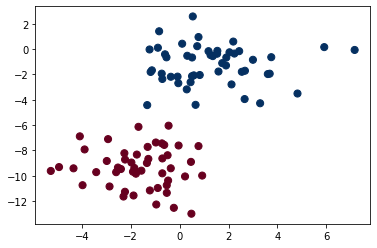

In [92]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

The result of this naive Gaussian assumption is shown in the following figure:

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.

With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [93]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

Now let's generate some new data and predict the label:

In [94]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

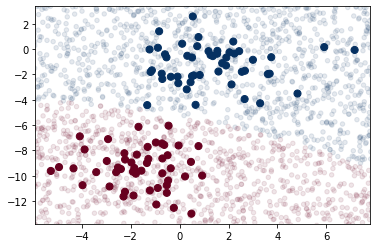

In [95]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [96]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [97]:
model.classes_

array([0, 1])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribution with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [69]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()


For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [70]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


Here is a representative entry from the data:

In [75]:
TfidfVectorizer().fit_transform(train.data)
train.target

array([2, 2, 1, ..., 2, 3, 1])

Show the distributions of lengths of the emails

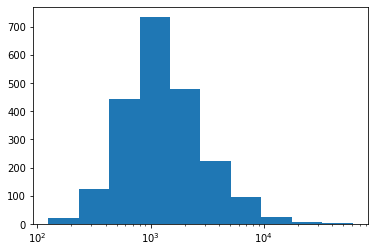

In [98]:
lens = [len(d) for d in train.data]

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(lens, 10)


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [100]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

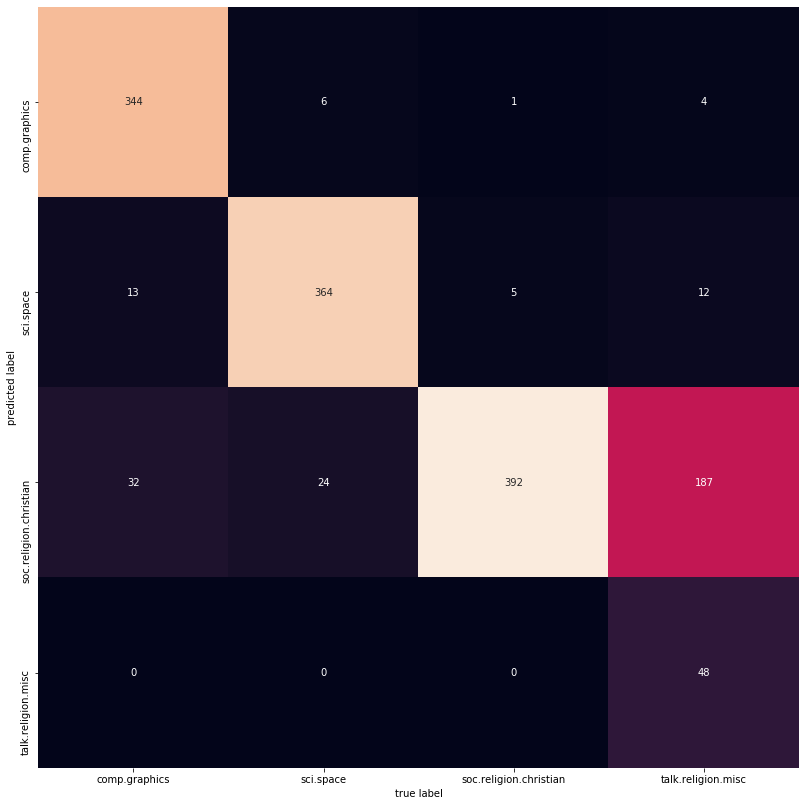

In [101]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(20,14))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [102]:
from sklearn.metrics import classification_report
print(classification_report(test.target, labels))


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



In [103]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [104]:
predict_category('sending a payload to the ISS')

'sci.space'

In [105]:
predict_category('sending bytes to the network')

'comp.graphics'

In [106]:
predict_category('sending chocolate')

'sci.space'

In [107]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [108]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.


